# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [8]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

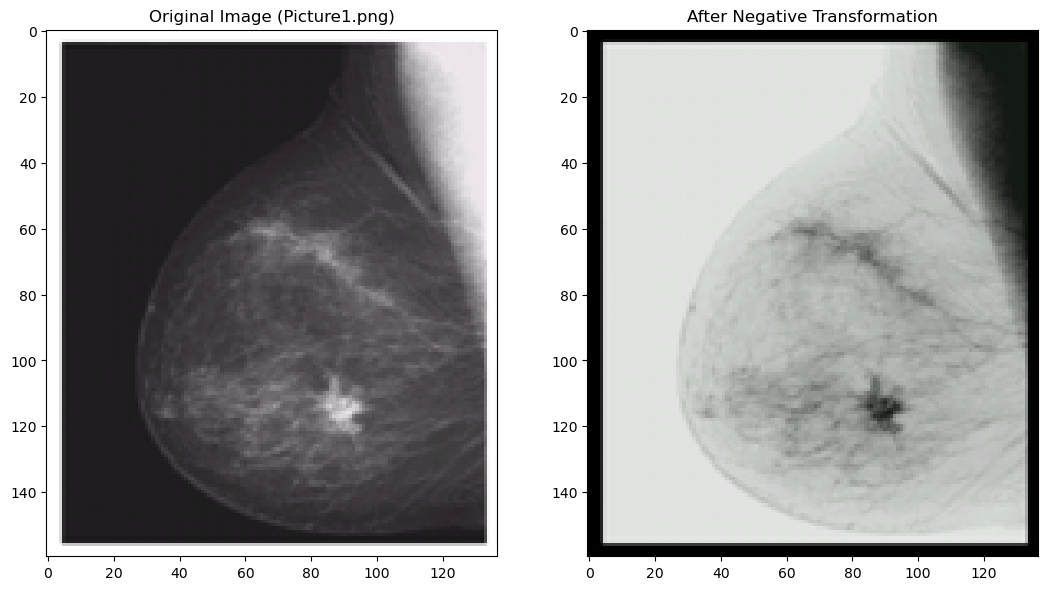

In [ ]:
'''
1
Negative Transformation
'''

from skimage import io, color, img_as_float

def Negative(img, threshold=0):
    """
    Apply color negative transformation:
    s = 255 - r
    """
    if img.shape[-1] == 4:
        img = img[:, :, :3]

   
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    neg_img = np.where(img > threshold, 255 - img, img)

    return neg_img


img = io.imread('imgs/Picture1.png')     
negative_img = Negative(img, threshold=0)  

# --- (3) Show before and after ---
show_images(
    [img, negative_img],
    ['Original Image (Picture1.png)', 'After Negative Transformation']
)


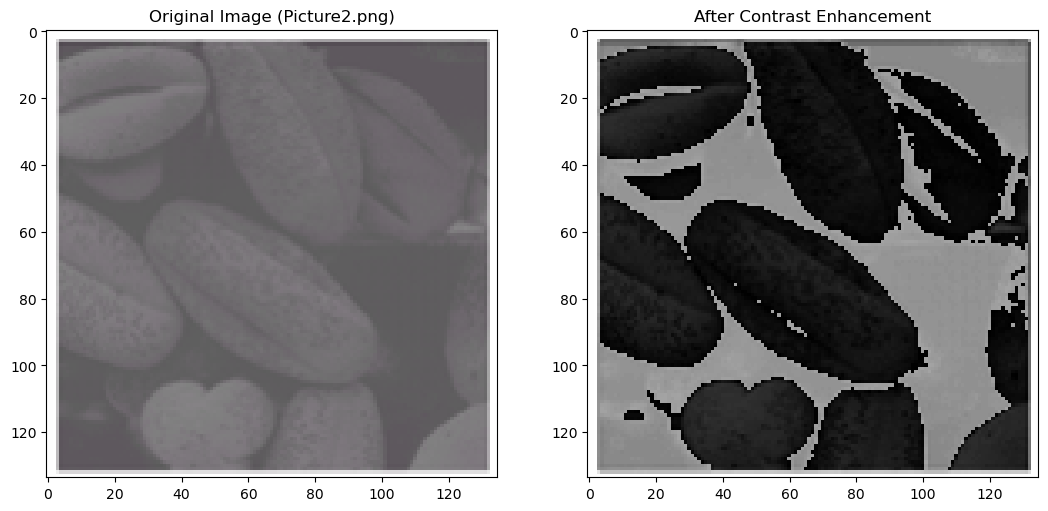

In [21]:
'''
2
Contrast Enhancement
'''
def Contrast_enhancement(img):
    """

    Equation: s = 50 + 1.5 * r   for 0 <= r <= 100
    """
    
    if img.ndim == 3:   
        if img.shape[-1] == 4: 
            img = img[:, :, :3]
        img_gray = color.rgb2gray(img)
        img_gray = (img_gray * 255).astype(np.uint8)
    else:
        img_gray = img.copy()

    
    enhanced = img_gray.copy().astype(float)


    mask = (img_gray >= 0) & (img_gray <= 100)
    enhanced[mask] = 50 + 1.5 * img_gray[mask]

    return enhanced


img = io.imread('imgs/Picture2.png')     
enhanced_img = Contrast_enhancement(img)  

show_images(
    [img, enhanced_img],
    ['Original Image (Picture2.png)', 'After Contrast Enhancement']
)


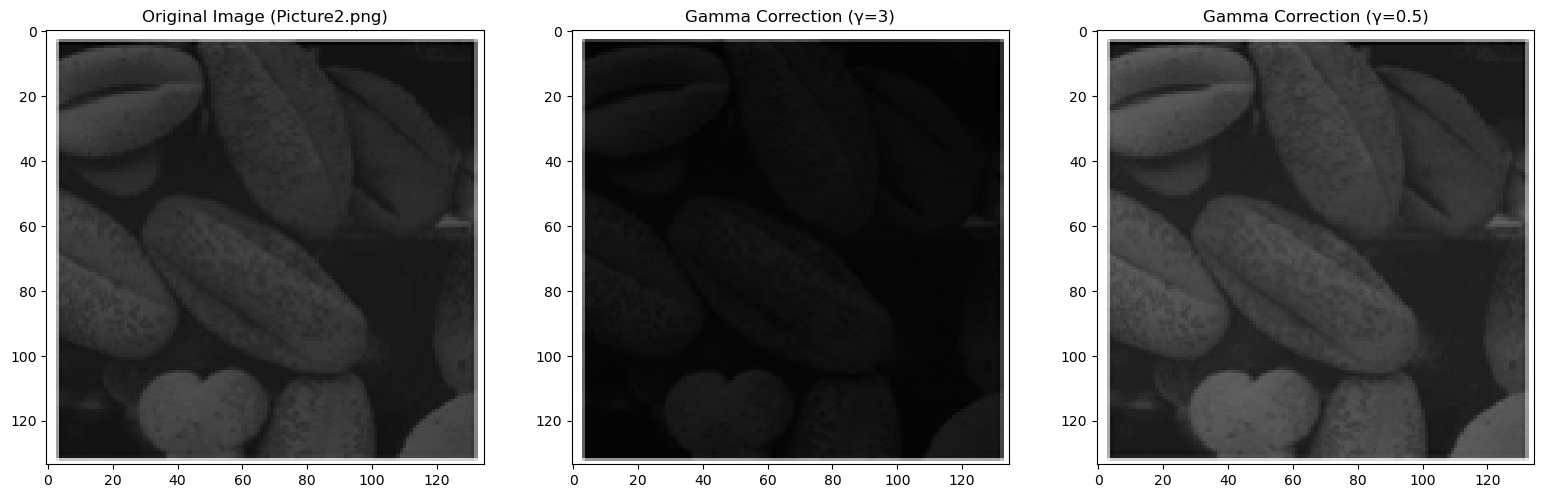

In [33]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, c=1, gamma=1):
   
    if img.shape[-1] == 4:
        img = img[:, :, :3]

    
    #img_gray = color.rgb2gray(img)

    img_norm = img_as_float(img)

    gamma_corrected = c * (img_norm ** gamma)


    return gamma_corrected


img = io.imread('imgs/Picture2.png',as_gray=True)

# Apply with two gamma values
gamma_img_3 = Gamma_Correction(img, c=1, gamma=3)      
gamma_img_05 = Gamma_Correction(img, c=1, gamma=0.5)   


show_images(
    [img, gamma_img_3, gamma_img_05],
    ['Original Image (Picture2.png)',
     'Gamma Correction (γ=3)',
     'Gamma Correction (γ=0.5)']
)


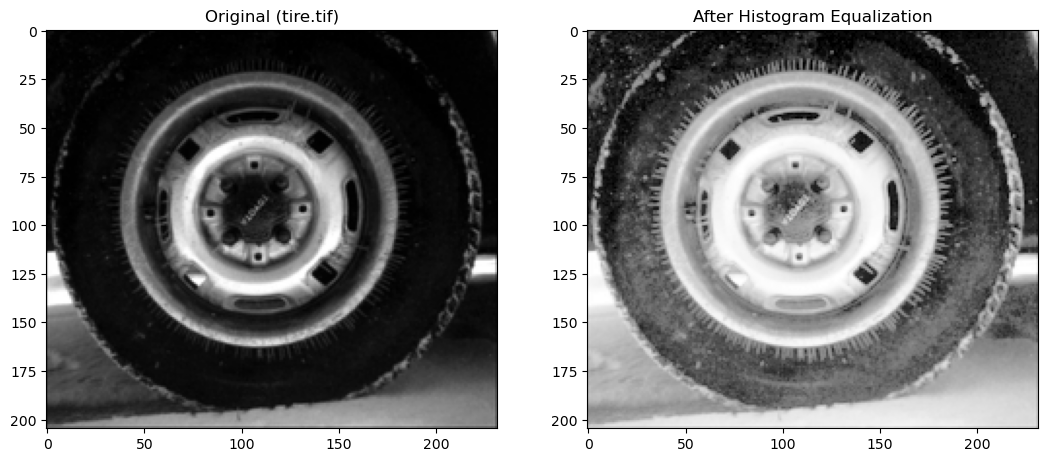

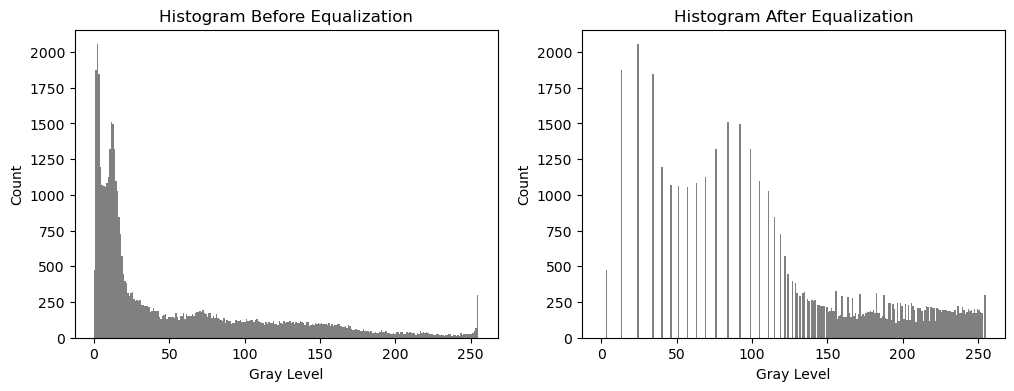

(array([[  6,  14,  10, ...,  98, 108,  80],
        [ 11,  16,  17, ..., 116, 153, 113],
        [ 11,  20,  15, ...,  88, 151, 109],
        ...,
        [ 39,  60,  67, ..., 132, 138, 100],
        [ 65,  99, 108, ..., 141, 145, 106],
        [ 73, 103,  99, ...,  99, 105,  75]], dtype=uint8),
 array([[ 51, 105,  76, ..., 199, 206, 188],
        [ 84, 115, 119, ..., 210, 230, 208],
        [ 84, 127, 111, ..., 193, 229, 206],
        ...,
        [153, 170, 176, ..., 219, 223, 200],
        [174, 200, 206, ..., 224, 226, 204],
        [182, 202, 200, ..., 200, 204, 183]], dtype=uint8),
 array([ 477, 1871, 2053, 1848, 1198, 1072, 1062, 1052, 1086, 1122, 1322,
        1513, 1498, 1320, 1098, 1026,  848,  725,  574,  449,  400,  380,
         314,  290,  315,  323,  273,  260,  262,  257,  263,  229,  232,
         221,  223,  222,  216,  183,  187,  210,  185,  186,  185,  143,
         134,  154,  162,  163,  131,  143,  143,  147,  145,  140,  173,
         146,  124,  154,  149,  1

In [26]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
   
    path = f'imgs/tire.tif'
    img = io.imread(path)

    if len(img.shape) == 3:
        img = color.rgb2gray(img)
        img = (img * 255).astype(np.uint8)

    N, M = img.shape
    G = 256  

   
    H = np.zeros(G, dtype=int)
    for i in range(N):
        for j in range(M):
            H[img[i, j]] += 1

    H_c = np.zeros(G, dtype=int)
    H_c[0] = H[0]
    for p in range(1, G):
        H_c[p] = H_c[p - 1] + H[p]

    T = np.round((G - 1) * H_c / (N * M)).astype(np.uint8)

    equalized_img = np.zeros_like(img)
    for i in range(N):
        for j in range(M):
            equalized_img[i, j] = T[img[i, j]]

    show_images(
        [img, equalized_img],
        [f'Original ({name}.{ext})', 'After Histogram Equalization']
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(img.ravel(), bins=nbins, range=[0, 255], color='gray')
    plt.title('Histogram Before Equalization')
    plt.xlabel('Gray Level'); plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(equalized_img.ravel(), bins=nbins, range=[0, 255], color='gray')
    plt.title('Histogram After Equalization')
    plt.xlabel('Gray Level'); plt.ylabel('Count')

    plt.show()

    return img, equalized_img, H, H_c, T


getImageWithHist('tire', 'tif')
    
